In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [20]:
# Load datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Check shape
train.shape, test.shape

((42000, 785), (28000, 784))

In [22]:
# Split label of train
train_x = train.drop('label', axis=1).astype('int32')
train_y = train['label'].astype('float32')
test = test.astype('float32')

train_x.shape, train_y.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [23]:
# Convert to 28x28 pixels array & normalization
train_x = train_x.values.reshape(-1, 28, 28, 1)
train_x = train_x / 255.0
test = test.values.reshape(-1, 28, 28, 1)
test = test / 255.0

train_x.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [29]:
# One Hot Encoding to label
train_y = tf.keras.utils.to_categorical(train_y, 10)

train_y.shape

(42000, 10)

## CNN

In [35]:
# Define layers 
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [37]:
# Compile and train 
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.fit(
    train_x,
    train_y,
    batch_size=32,
    epochs=10,
    verbose=1,
)

Epoch 1/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1465 - accuracy: 0.9558
Epoch 2/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 3/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0269 - accuracy: 0.9913
Epoch 4/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0183 - accuracy: 0.9939
Epoch 5/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 6/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 7/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 8/10
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 9/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 10/10
1313/1313 [==============================] - 17s 13m

In [41]:
# Predict and select the result with maximum probability
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')

875/875 [==============================] - 4s 4ms/step


1/1 [==============================] - 0s 32ms/step
The value is: 3


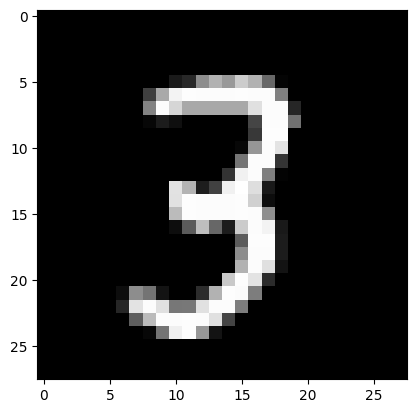

In [49]:
# Test and show image result
ran_num = rd.randrange(len(test))
plt.imshow(test[ran_num].reshape(28, 28), cmap="gray")

y_predict = model.predict(test[ran_num].reshape(1, 28, 28, 1))
print(f"The value is: {np.argmax(y_predict)}")